In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [10]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # print(data_temp.size)
    return data_temp

In [92]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        
        if "FCs" in path: 
            if "FCs0.1E1w1_Mean5" in path: 
                data["Mode"] += " (FCs0.1E1)"
                pass
            else:
                continue
        
        if "Mean1" in path:
            data["Mode"] += "+M1"
            continue
        elif "Mean2" in path:
            data["Mode"] += "+M2"
            continue
        elif "Mean5" in path:
            data["Mode"] += "+M5"
            continue
        else:
            # continue
            pass
        
        if "G11" in path and "LR1.2" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.2)"
        elif "G11" in path and "LR1.5" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.5)"
        elif "G11" in path and "LR1.0" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR1.0)"
        elif "G11" in path and "LR0.8" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.8)"
        elif "G11" in path and "LR0.6" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.6)"
        elif "G11" in path and "LR0.3" in path and "Mean" in path:
            data["Mode"] += "+G11 (LR0.3)"
        elif "G11" in path: continue

        if "gs11" in path: continue
            # data["Mode"] += "+gs11"
            # continue
        elif "gs12" in path: 
            continue
        elif "gs21" in path: continue
        elif "gs22" in path: continue
        elif "gs31" in path: 
            data["Mode"] += "+gs31"
            continue
            # continue
        elif "gs32" in path: 
            data["Mode"] += "+gs32"
            continue
        elif "gs411" in path: data["Mode"] += "+gs411"
        elif "gs412" in path: data["Mode"] += "+gs412"
        elif "gs41" in path: data["Mode"] += "+gs41"
        elif "gs421" in path: 
            data["Mode"] += "+gs421"
            continue
        elif "gs41" in path: 
            data["Mode"] += "+gs41"
            # continue
        elif "gs42" in path: 
            data["Mode"] += "+gs42"
            continue
        elif "gs61L0.01L0.1" in path: 
            data["Mode"] += "+gs61L0.01L0.1"
        elif "gs61L0.01L0.1" in path: 
            data["Mode"] += "+gs61L0.01L0.01"
        elif "gs61L0.01L0.1" in path: 
            data["Mode"] += "+gs61L0.01L0.001"

        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

/tmp/ipykernel_2203439/1382366616.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)


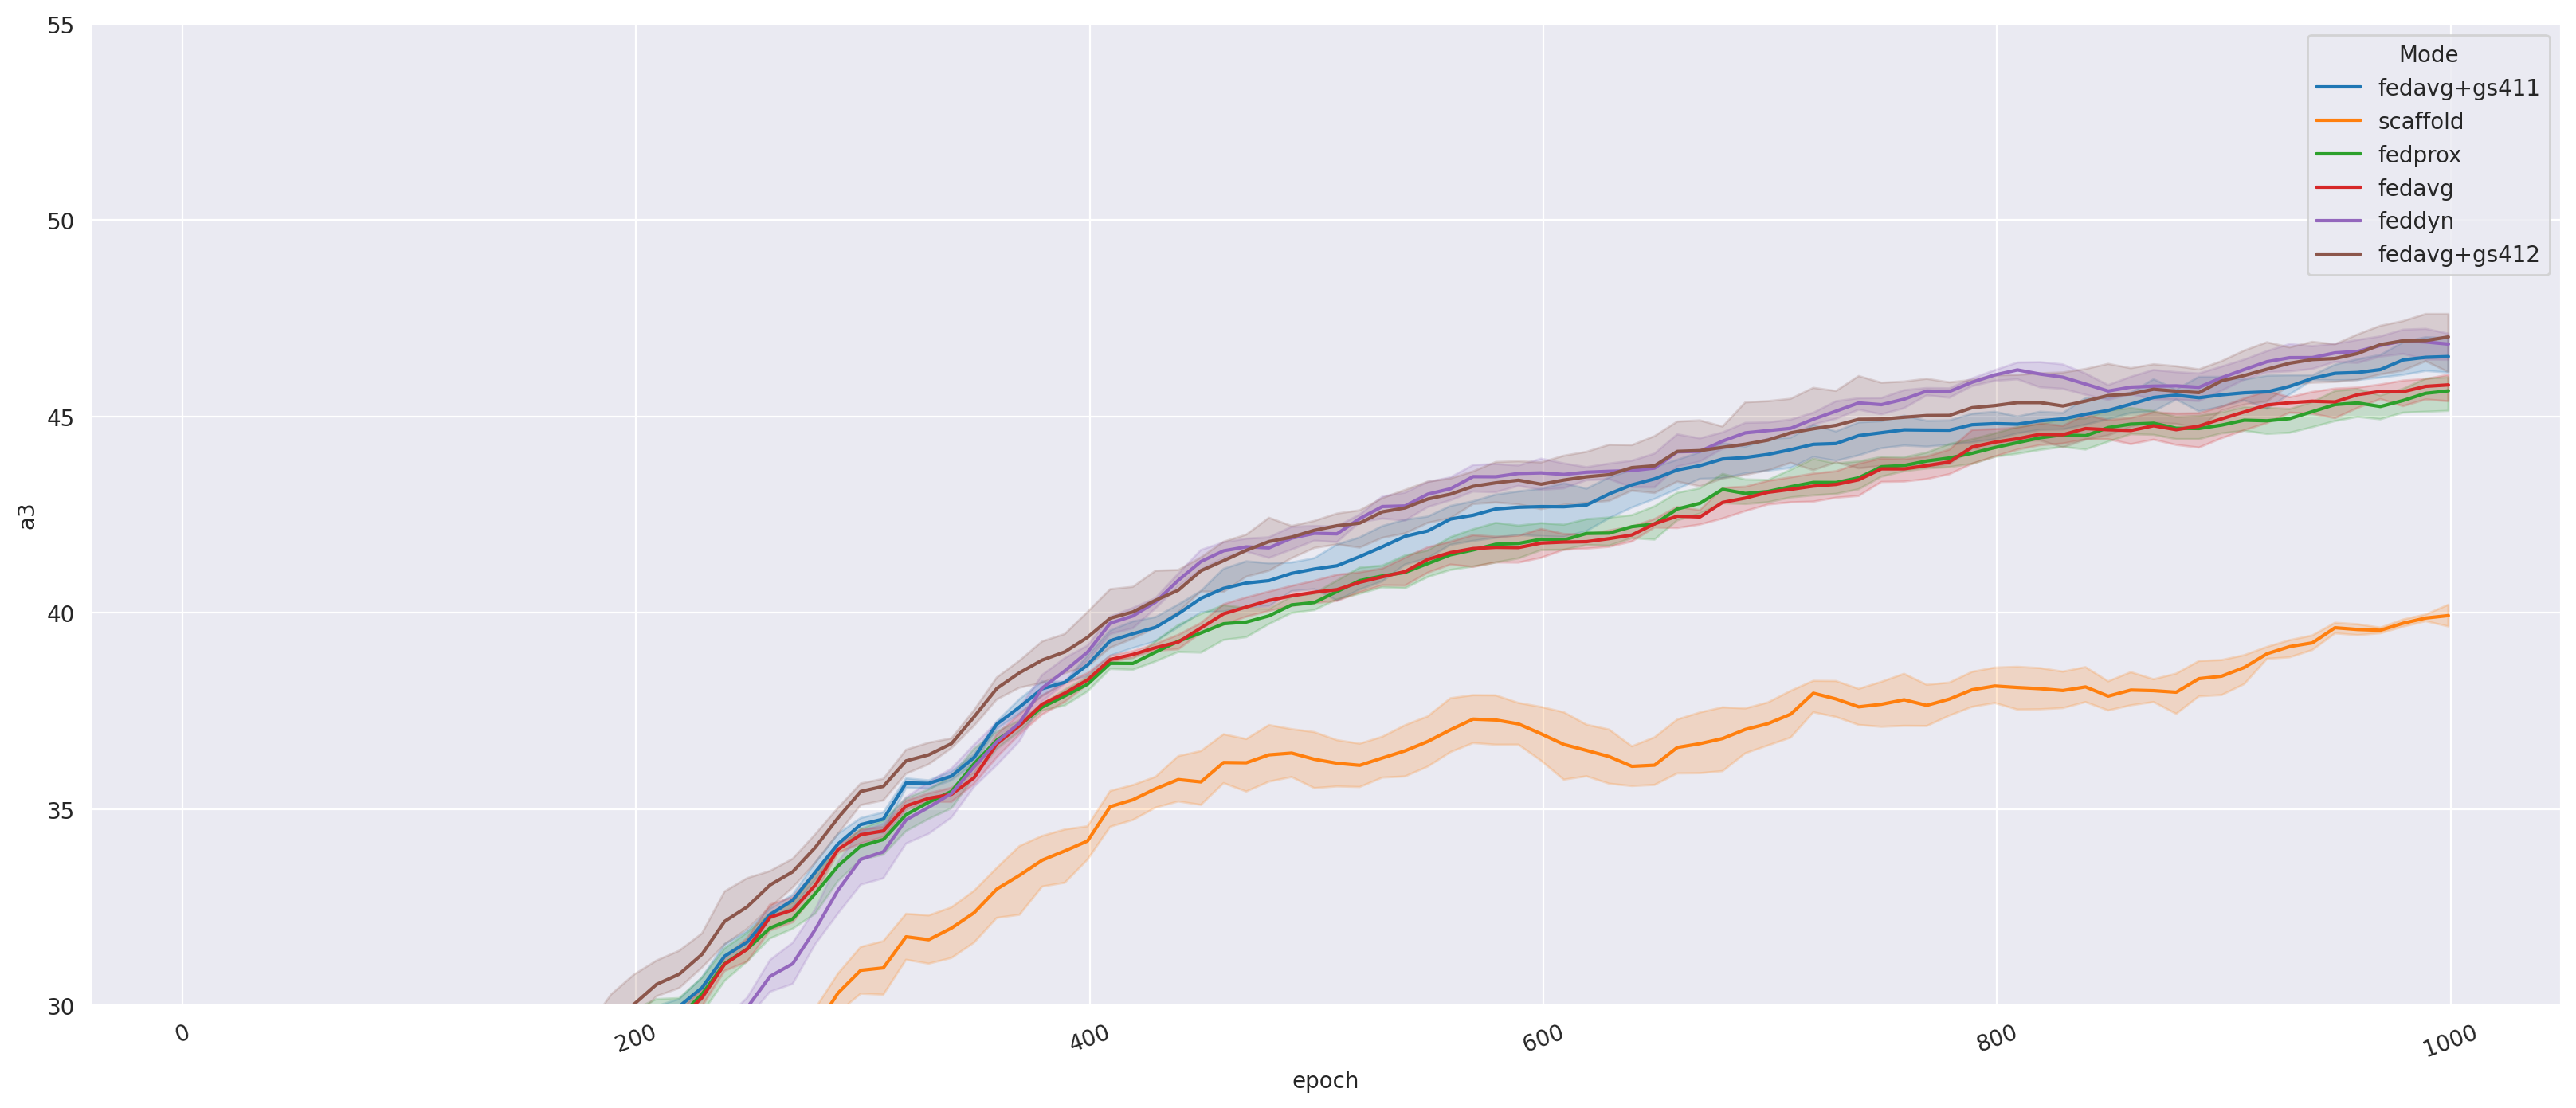

In [88]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 999]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", ax=ax)
    ax.set_ylim([30,55])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)

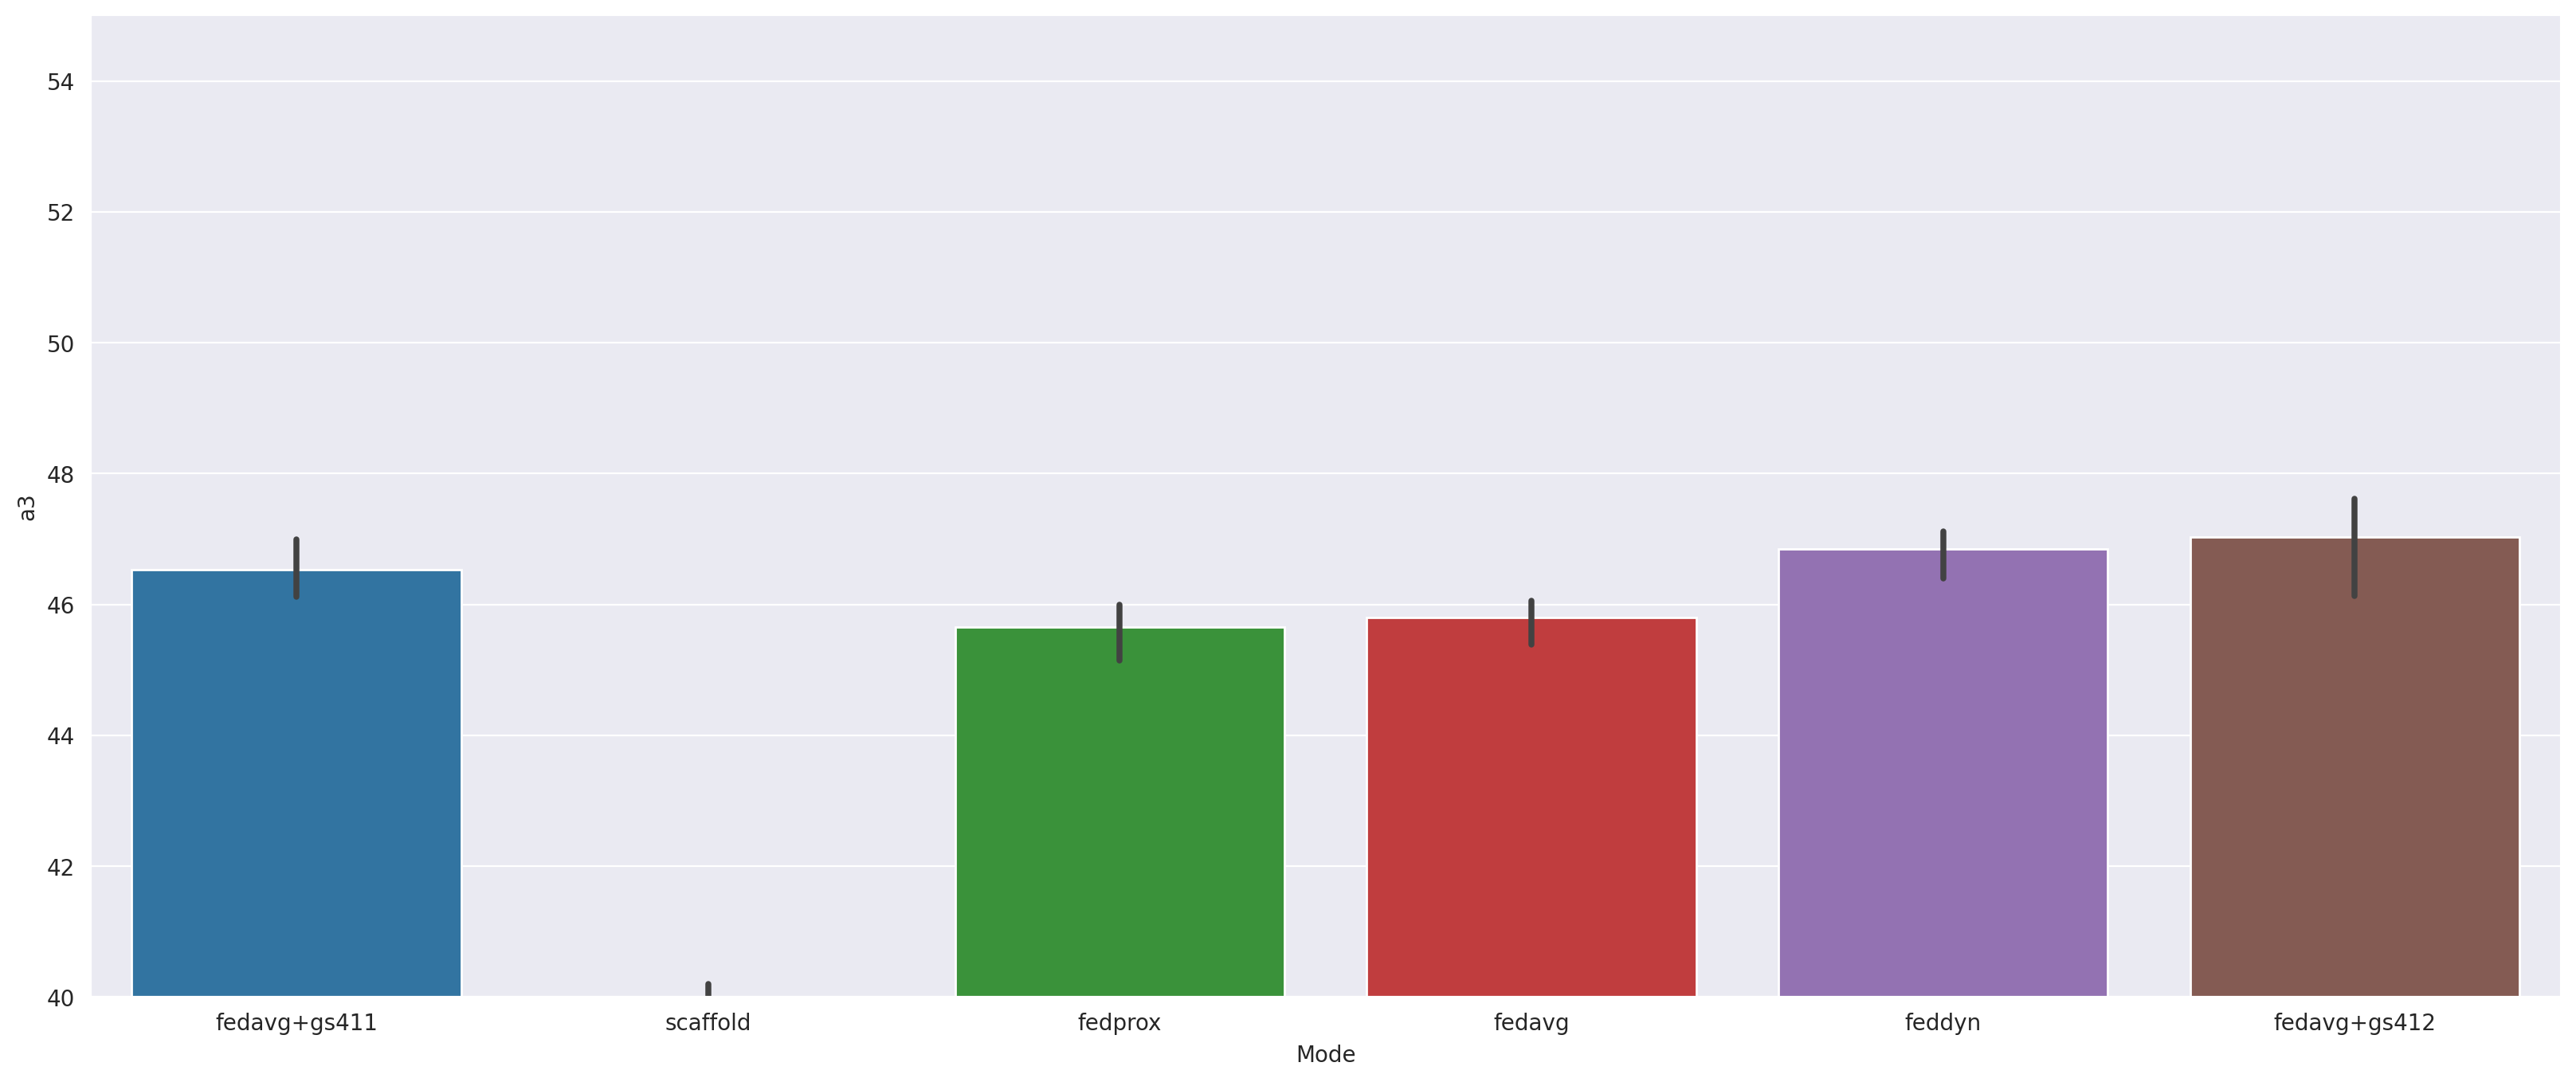

In [86]:
data_temp = load_data("../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv")

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] == 999]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax)
    ax.set_ylim([40,55])
    # ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # for label in labels:
    #     if "gs31" in label: label = "clf warm up for 2 epochs" 
    #     if "gs32" in label: label = "enc + clf warm up for 2 epochs" 
    #     if "gs41" in label: label = "clf lr x 0.1 for 2 epochs" 
    # ax.set_xticklabels(labels)

/tmp/ipykernel_2203439/2557487862.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)


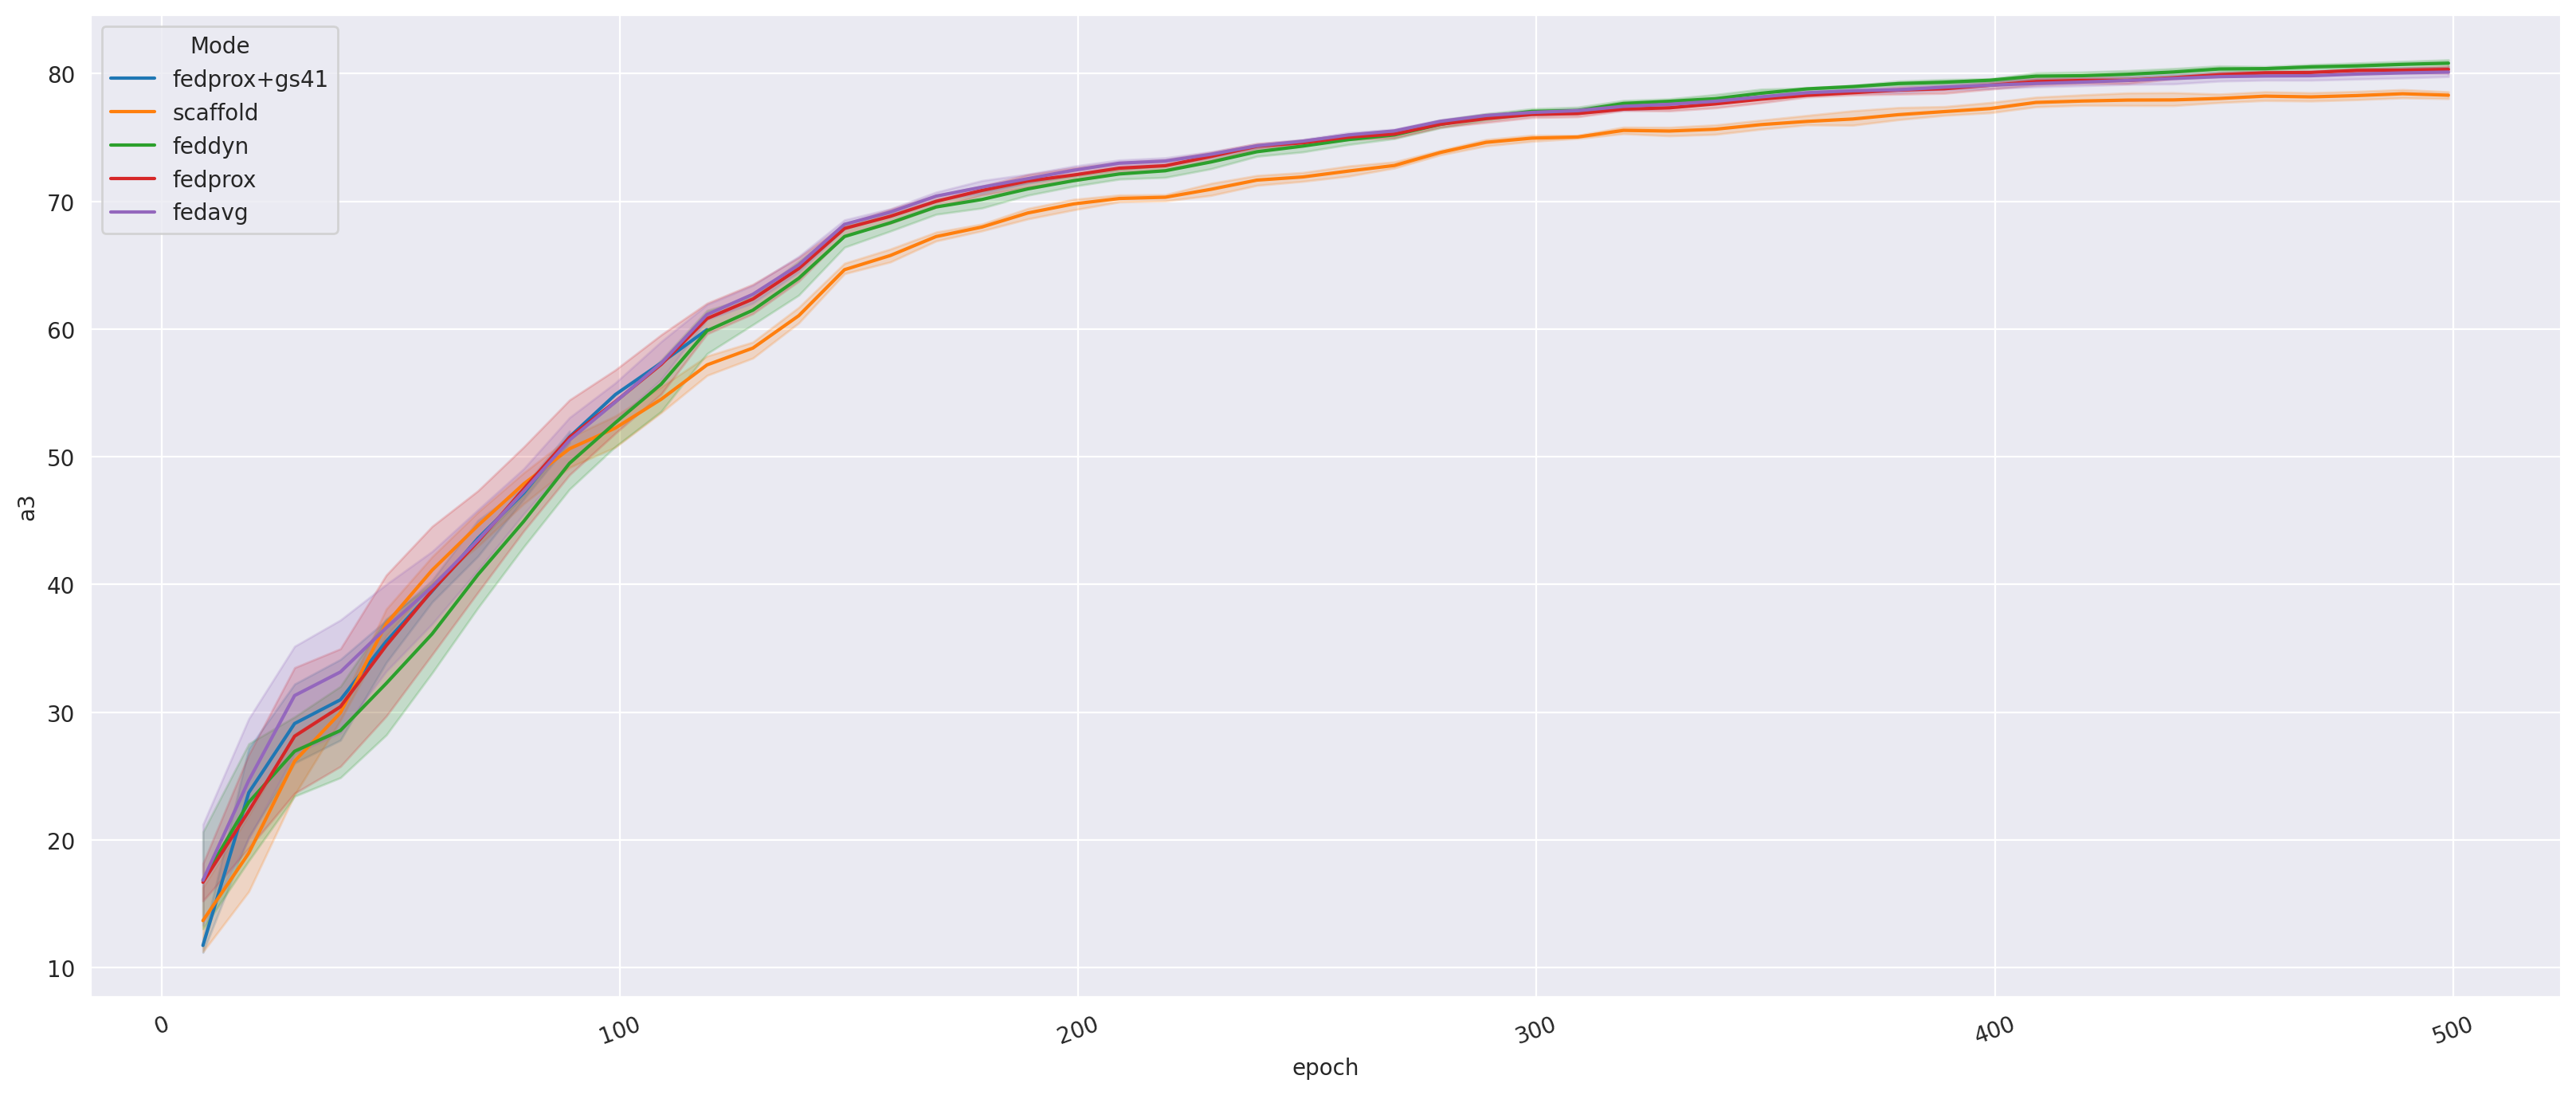

In [96]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

fig, axes = plt.subplots(1, 1, figsize=(20,8), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[temp["epoch"] <= 499]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", ax=ax)
    # ax.set_ylim([20,55])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)

In [95]:
temp["Mode"]

0    fedprox+gs41
1    fedprox+gs41
2    fedprox+gs41
3    fedprox+gs41
4    fedprox+gs41
5    fedprox+gs41
6    fedprox+gs41
7    fedprox+gs41
0    fedprox+gs41
1    fedprox+gs41
2    fedprox+gs41
3    fedprox+gs41
4    fedprox+gs41
Name: Mode, dtype: object